In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications import VGG16, ResNet50

import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['treino_superior.csv']


## Carregando o Conjunto de dados

In [5]:
df = pd.read_csv("../input/treino_superior.csv")

In [6]:
df

,image,Hip_Center_A,Hip_Center_X,Hip_Center_Y,Hip_Center_Z,Spine_A,Spine_X,Spine_Y,Spine_Z,Shoulder_Center_A,...,Elbow_Right_Y,Elbow_Right_Z,Wrist_Right_A,Wrist_Right_X,Wrist_Right_Y,Wrist_Right_Z,Hand_Right_A,Hand_Right_X,Hand_Right_Y,Hand_Right_Z
0,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.570152,-0.944097,0.286484,-0.163173,3.063737,-0.941555,0.221195,-0.254293,12.001480,...,-0.639260,-0.706866,99.382800,0.441484,-0.692808,-0.570184,99.382800,0.441484,-0.692808,-0.570184
1,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.419137,-0.987914,0.148455,-0.044462,3.274432,-0.918400,0.311039,-0.244786,10.977960,...,-0.585018,-0.757765,75.796610,0.239591,-0.431182,-0.869873,75.796610,0.239591,-0.431182,-0.869873
2,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.451614,-0.994781,-0.093723,0.040921,3.277300,-0.961712,0.189761,-0.198078,10.069560,...,-0.447770,-0.866595,65.746670,-0.078148,0.029207,-0.996514,65.746670,-0.078148,0.029207,-0.996514
3,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.441755,-0.977248,-0.207215,0.045339,3.298727,-0.983364,0.034101,-0.178411,9.379197,...,-0.401229,-0.901029,60.500340,-0.029309,-0.062096,-0.997640,60.500340,-0.029309,-0.062096,-0.997640
4,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.424272,-0.956401,-0.287558,0.050876,3.218249,-0.979314,-0.055462,-0.194693,9.060166,...,-0.382702,-0.916057,49.017070,-0.013667,-0.133254,-0.990988,49.017070,-0.013667,-0.133254,-0.990988
5,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.346437,-0.949901,-0.308958,0.048163,2.904783,-0.971247,-0.104616,-0.213971,8.694258,...,-0.446010,-0.892109,31.804610,-0.102802,0.036129,-0.994046,31.804610,-0.102802,0.036129,-0.994046
6,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4.109427,-0.947197,-0.320049,0.020443,2.528789,-0.933999,-0.294581,-0.202510,7.931909,...,-0.424039,-0.905543,19.467860,-0.119338,-0.024551,-0.992552,19.467860,-0.119338,-0.024551,-0.992552
7,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,3.806412,-0.937827,-0.334244,-0.093763,2.516999,-0.784647,-0.597044,-0.166868,7.451880,...,-0.747909,-0.660413,4.223479,-0.459717,-0.781809,-0.421260,4.223479,-0.459717,-0.781809,-0.421260
8,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,3.715663,-0.916500,-0.342997,-0.205829,2.562917,-0.672153,-0.717314,-0.183685,7.296063,...,-0.975792,0.120505,7.982704,-0.245769,-0.887166,0.390584,7.982704,-0.245769,-0.887166,0.390584
9,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,3.715453,-0.904153,-0.346066,-0.250650,2.508588,-0.630913,-0.746515,-0.211479,6.926343,...,-0.853953,0.493675,12.154310,-0.187180,-0.687638,0.701516,12.154310,-0.187180,-0.687638,0.701516


In [7]:
df.columns

Index(['image', ' Hip_Center_A', ' Hip_Center_X', ' Hip_Center_Y',
       ' Hip_Center_Z', ' Spine_A', ' Spine_X', ' Spine_Y', ' Spine_Z',
       ' Shoulder_Center_A', ' Shoulder_Center_X', ' Shoulder_Center_Y',
       ' Shoulder_Center_Z', ' Head_A', ' Head_X', ' Head_Y', ' Head_Z',
       ' Shoulder_Left_A', ' Shoulder_Left_X', ' Shoulder_Left_Y',
       ' Shoulder_Left_Z', ' Elbow_Left_A', ' Elbow_Left_X', ' Elbow_Left_Y',
       ' Elbow_Left_Z', ' Wrist_Left_A', ' Wrist_Left_X', ' Wrist_Left_Y',
       ' Wrist_Left_Z', ' Hand_Left_A', ' Hand_Left_X', ' Hand_Left_Y',
       ' Hand_Left_Z', ' Shoulder_Right_A', ' Shoulder_Right_X',
       ' Shoulder_Right_Y', ' Shoulder_Right_Z', ' Elbow_Right_A',
       ' Elbow_Right_X', ' Elbow_Right_Y', ' Elbow_Right_Z', ' Wrist_Right_A',
       ' Wrist_Right_X', ' Wrist_Right_Y', ' Wrist_Right_Z', ' Hand_Right_A',
       ' Hand_Right_X', ' Hand_Right_Y', ' Hand_Right_Z'],
      dtype='object')

### Descartando colunas que não serão usadas.
### As que serão usadas são os dois cotovelos e os dois ombros.

In [133]:
df = df[['image', ' Shoulder_Left_A', ' Shoulder_Left_X', ' Shoulder_Left_Y',
       ' Shoulder_Left_Z', ' Elbow_Left_A', ' Elbow_Left_X', ' Elbow_Left_Y',
       ' Elbow_Left_Z',' Shoulder_Right_A', ' Shoulder_Right_X',
       ' Shoulder_Right_Y', ' Shoulder_Right_Z', ' Elbow_Right_A',
       ' Elbow_Right_X', ' Elbow_Right_Y', ' Elbow_Right_Z']]

In [134]:
df.columns.size

17

## Checando nulidade de valores

In [135]:
df.isnull().sum()

image                0
 Shoulder_Left_A     1
 Shoulder_Left_X     1
 Shoulder_Left_Y     1
 Shoulder_Left_Z     1
 Elbow_Left_A        2
 Elbow_Left_X        2
 Elbow_Left_Y        2
 Elbow_Left_Z        2
 Shoulder_Right_A    0
 Shoulder_Right_X    0
 Shoulder_Right_Y    0
 Shoulder_Right_Z    0
 Elbow_Right_A       0
 Elbow_Right_X       0
 Elbow_Right_Y       0
 Elbow_Right_Z       0
dtype: int64

## Removendo linhas que têm valores nulos

In [136]:
df = df.dropna(axis=0).reset_index(drop=True)

## Convertendo a imagem em base64 para numpy array

(640, 480)
(480, 640, 3)


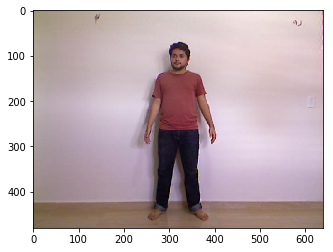

In [137]:
encoded = df['image'][0]
decoded_image = base64.b64decode(encoded)
img = Image.open(BytesIO(decoded_image))
print(img.size)
arr = np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)

print(arr.shape)
plt.imshow(arr)
#dimensions = (28, 28)

#img = Image.open(BytesIO(decoded_image)).convert('LA')
# image is (28, 28)

#img = img.resize(dimensions, Image.ANTIALIAS)
#pixels.shape == (28, 28, 2)
#pixels = np.asarray(img, dtype='uint8')
#print(pixels)
#plt.imshow(pixels)
# pixel data is lost


In [138]:
#função que recebe uma imagem em base 64 e rotrna array do numpy rgb
def getImageNp(imgB64):
    decoded_image = base64.b64decode(imgB64)
    img = Image.open(BytesIO(decoded_image))
    arr = np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)
    return arr

def getImageNp1D(imgB64):
    decoded_image = base64.b64decode(imgB64)
    img = Image.open(BytesIO(decoded_image))
    arr = np.array(img.getdata())
    arr.astype(int)
    return arr

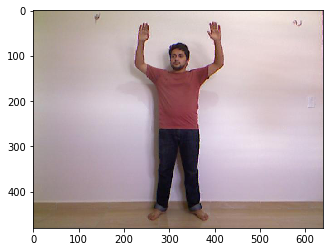

In [139]:
plt.imshow(getImageNp(df['image'][40]))

In [140]:
#freq = 10
#for i in range(101):
#    plt.imshow(getImageNp(df['image'][i]))
#    if (i + freq <= 100):
#        i += freq

In [141]:
teste = [x for x in range(720) if (x+1)%5==0]
len(teste)

144

# Divindo os dados em treino e teste

### Dividindo coluna das fotos das restantes

In [142]:
#X é a coluna das fotos
X = df['image']
#y são as restantes. A "resposta"
y = df.drop(columns="image")


In [143]:
y.values.shape

(151, 16)

In [144]:
freq = 5
tam = 720

linhas = [x for x in range(tam) if (x+1)%freq==0]
print(linhas)
total = len(linhas)

Xtmp = np.zeros((X.shape[0], 480, 640, 3)).astype(int)
for i in range(X.shape[0]):
    print("Carregando img ", i)
    im = getImageNp(X[i])
    #print(im.shape)
    Xtmp[i] = im
    
    
    #Xtmp = np.append(Xtmp, im)

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299, 304, 309, 314, 319, 324, 329, 334, 339, 344, 349, 354, 359, 364, 369, 374, 379, 384, 389, 394, 399, 404, 409, 414, 419, 424, 429, 434, 439, 444, 449, 454, 459, 464, 469, 474, 479, 484, 489, 494, 499, 504, 509, 514, 519, 524, 529, 534, 539, 544, 549, 554, 559, 564, 569, 574, 579, 584, 589, 594, 599, 604, 609, 614, 619, 624, 629, 634, 639, 644, 649, 654, 659, 664, 669, 674, 679, 684, 689, 694, 699, 704, 709, 714, 719]
Carregando img  0
Carregando img  1
Carregando img  2
Carregando img  3
Carregando img  4
Carregando img  5
Carregando img  6
Carregando img  7
Carregando img  8
Carregando img  9
Carregando img  10
Carregando img  11
Carregando img  12
Carregando img  13
Carregando img  14
Carregando img  15
Carrega

In [145]:
Xtmp.shape

(151, 480, 640, 3)

In [146]:
#Xtmp = np.zeros((140, 480, 640, 3)).astype(int)
#for i in range(140):
#    print("Carregando img ", i)
#    im = getImageNp(X[i])
    #print(im.shape)
#    Xtmp[i] = im

### Normalizando as imagens.
Dividir as imagens por 255 coloca cada pixel em um intervalo de 0 a 1, facilitando o aprendizado da rede.

In [147]:
Xtmp = Xtmp.astype('float32')/255

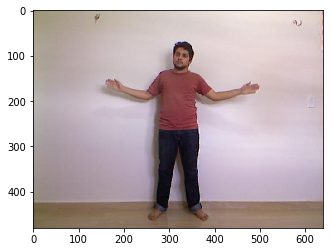

In [148]:
#Xtmp = Xtmp.reshape(-1, 480, 640, 3)
#Xtmp[0]
plt.imshow(Xtmp[70])
#np.array_equal(Xtmp[0], getImageNp(df['image'][0]))

#getImageNp1D(df['image'][0])

In [149]:
y.values.shape

(151, 16)

In [3]:
y.max()

NameError: name 'y' is not defined

In [151]:
np.bincount(y.index)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [152]:
Xtmp.shape

(151, 480, 640, 3)

In [154]:
print(Xtmp.shape)
#Divisão dos conjuntos de treino e teste
rdn_st = 42
X_train, X_test, y_train, y_test = train_test_split(Xtmp, y, test_size=0.3, random_state=rdn_st)


(151, 480, 640, 3)


## Definindo o modelo

In [157]:
#Carregando rede treinada VGG16
inception = VGG16(include_top=False, input_shape=(480, 640, 3))

58892288/58889256 [==============================] - 7s 0us/step


In [1]:
#In -> MaxPool2D -> [VGG16] -> Flatten -> Out

model = Sequential()
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(inception)

model.add(Flatten())
model.add(Dense(16, activation = "relu"))

NameError: name 'Sequential' is not defined

In [159]:
sgd = SGD(lr=0.0001)

In [160]:
model.compile(optimizer = sgd , loss = "mean_squared_error", metrics=["mean_squared_error"])

In [ ]:
history = model.fit(X_train, y_train.values, epochs=10, batch_size=64)

Epoch 1/10
105/105 [==============================] - 3794s 36s/step - loss: 971.4256 - mean_squared_error: 971.4256
Epoch 2/10
105/105 [==============================] - 1236s 12s/step - loss: 678.3255 - mean_squared_error: 678.3255
Epoch 3/10
105/105 [==============================] - 1159s 11s/step - loss: 948.1008 - mean_squared_error: 948.1008
Epoch 4/10
105/105 [==============================] - 1206s 11s/step - loss: 908.5080 - mean_squared_error: 908.5080
Epoch 5/10
105/105 [==============================] - 1412s 13s/step - loss: 791.7757 - mean_squared_error: 791.7757
Epoch 6/10


In [ ]:
for i in range(1, 6):
    img = X_test[i]
    img_class = model.predict(X_test)
    prediction = img_class[i]
    classname = img_class[i]
    print("Predicted: ",str(classname))
    print("Correct: ", str(y_test.values[i]))
    #img = img.reshape((28,28))
    plt.imshow(img)
    plt.title(classname)
    plt.show()